# Procesos estocásticos a tiempo continuo (Espacio de estados discreto)

# 1. Introducción al Proceso de Mutación

## 1.1. Contexto Biológico

En genética, los alelos son diferentes versiones de un gen. En una población, los alelos pueden cambiar con el tiempo debido a mutaciones, selección natural y deriva genética. Modelaremos cómo un alelo muta a otro con ciertas tasas.

## 1.2. Modelo Simplificado

Consideremos un gen con dos alelos posibles:

- Alelo A
- Alelo B

Las mutaciones pueden ocurrir de A a B y de B a A con ciertas tasas.

# 2. Formulación de la Cadena de Markov en Tiempo Continuo

## 2.1. Estados del Modelo

Dado que estamos considerando mutaciones entre dos alelos, los estados posibles son:

- **Estado A**: El gen está en el alelo A.
- **Estado B**: El gen está en el alelo B.

## 2.2. Tasas de Transición

Definimos las tasas de transición:

- **Tasa de mutación de A a B** ($\lambda_{AB}$)
- **Tasa de mutación de B a A** ($\lambda_{BA}$)

Estas tasas representan la tasa por unidad de tiempo a la cual ocurren las mutaciones.

## 2.3. Matriz Generadora de Tasas (Matriz Q)

La matriz $Q$ para una cadena de Markov en tiempo continuo es:

$$
Q = \begin{pmatrix}
-\lambda_{AB} & \lambda_{AB} \\
\lambda_{BA} & -\lambda_{BA}
\end{pmatrix}
$$

En las cadenas de Markov en tiempo continuo, la matriz $Q$ es conocida como la *matriz generadora de tasas* o *matriz infinitesimal*. Esta matriz describe las tasas a las que el proceso cambia de un estado a otro. A diferencia de las cadenas en tiempo discreto, donde usamos matrices de probabilidades de transición, en tiempo continuo utilizamos tasas de transición.

Los elementos diagonales de $Q$, es decir, $Q_{ii}$, representan la *tasa de salida* del estado $i$. Por definición:

$$
Q_{ii} = -\lambda_i
$$

donde $\lambda_i$ es la tasa total a la que el proceso sale del estado $i$.

**Razón por la que $Q_{ii}$ es negativo:**

- Los elementos $Q_{ii}$ deben ser tales que, al sumar todos los elementos de la fila $i$ de $Q$, el resultado sea cero. Esto se debe a que las tasas de transición representan flujos de probabilidad.
- Si consideramos que $Q_{ij}$ (para $j \neq i$) es la tasa a la que el proceso transita de $i$ a $j$, entonces la tasa total de salida del estado $i$ es:

$$
\lambda_i = \sum_{j \neq i} Q_{ij}
$$

- Para equilibrar las tasas y mantener la conservación de la probabilidad, definimos:

$$
Q_{ii} = -\lambda_i = - \sum_{j \neq i} Q_{ij}
$$

Las filas de la matriz $Q$ suman cero:

$$
\sum_j Q_{ij} = Q_{ii} + \sum_{j \neq i} Q_{ij} = -\lambda_i + \lambda_i = 0
$$

**Razón:**

- Esto refleja el hecho de que la *tasa neta de cambio de probabilidad* en cada estado es cero cuando se considera el flujo total de entrada y salida en infinitesimales intervalos de tiempo.
- En otras palabras, la disminución de probabilidad en el estado $i$ debido a las transiciones hacia otros estados es compensada por las entradas desde otros estados hacia $i$.

# 3.1. Tiempo de Espera en un Estado

En cadenas de Markov en tiempo continuo, el *tiempo de permanencia* en un estado $i$ es una variable aleatoria que sigue una **distribución exponencial** con parámetro $\lambda_i= -Q_{ii}$, que es la tasa de salida del estado $i$.

### Función de densidad de probabilidad (PDF) de la distribución exponencial:

$$
f(t) = \lambda_i e^{-\lambda_i t}, \quad t \geq 0
$$

La distribución exponencial surge naturalmente en procesos de *Poisson* y en cadenas de Markov en tiempo continuo debido a la *falta de memoria* (propiedad de Markov).

### Propiedades clave:

- **Sin memoria (memoryless)**: La probabilidad de que ocurra una transición en el siguiente intervalo de tiempo no depende del tiempo que ya se ha pasado en el estado actual.

- **Proceso de Poisson**: Las transiciones en una cadena de Markov en tiempo continuo ocurren según un proceso de Poisson, donde los eventos (transiciones) ocurren de forma independiente y con una tasa constante en el tiempo.

### Matemáticamente:

La probabilidad de que el proceso permanezca en el estado $i$ hasta al menos el tiempo $t$ es:

$$
P(T > t) = e^{-\lambda_i t}
$$

Esto es exactamente la función de supervivencia de una variable exponencial.

## 2.3. Interpretación Intuitiva

- **Alta tasa de salida ($\lambda_i$ grande)**: El proceso tiende a salir rápidamente del estado $i$, resultando en tiempos de permanencia cortos.

- **Baja tasa de salida ($\lambda_i$ pequeña)**: El proceso permanece más tiempo en el estado $i$, con tiempos de permanencia más largos.

### ANEXO: Propiedad de Falta de Memoria

La distribución exponencial es única entre las distribuciones continuas por su **propiedad de falta de memoria** (*memoryless property*). Esto significa que, para una variable aleatoria $T$ que sigue una distribución exponencial con parámetro $\lambda$, la probabilidad de que $T$ exceda una cantidad de tiempo adicional $s$, dado que ya ha excedido un tiempo $t$, es independiente de $t$:

$$
P(T > t + s \mid T > t) = P(T > s)
$$

**Interpretación:** El tiempo adicional que debemos esperar para que ocurra un evento (por ejemplo, una transición en una cadena de Markov en tiempo continuo) no depende del tiempo que ya hemos esperado.

#### La probabilidad condicional es:

$$
P(T > t + s \mid T > t) = \frac{P(T > t + s)}{P(T > t)} = \frac{e^{-(t+s)}}{e^{-t}} = e^{-s} = P(T > s)
$$

Esto confirma la propiedad de falta de memoria teóricamente.

### Implementación en Python

El objetivo es crear un script en Python que demuestre esta propiedad mediante simulaciones y análisis estadístico.

In [8]:
# Parámetro de la distribución exponencial
lambda_param = 1.0  # Tasa de eventos por unidad de tiempo

# Número de muestras
num_muestras = 100000

# Generar tiempos de espera exponenciales
tiempos_espera = np.random.exponential(scale=1/lambda_param, size=num_muestras)


### Verificación de la Propiedad de Falta de Memoria

Seleccionamos un tiempo $t$ y un tiempo adicional $s$, y comparamos las siguientes probabilidades estimadas:

$$
P(T > t + s)
$$

$$
P(T > t + s \mid T > t)
$$

Según la propiedad de falta de memoria, deberíamos tener:

$$
P(T > t + s \mid T > t) = P(T > s)
$$

**Procedimiento:**

1. **Calcular** $P(T > t + s)$:

   $$ P(T > t + s) = \frac{\text{Número de muestras donde } T > t + s}{\text{Número total de muestras}} $$

2. **Calcular** $P(T > t + s \mid T > t)$:

   $$ P(T > t + s \mid T > t) = \frac{\text{Número de muestras donde } T > t + s}{\text{Número de muestras donde } T > t} $$

3. **Calcular** $P(T > s)$:

   $$ P(T > s) = \frac{\text{Número de muestras donde } T > s}{\text{Número total de muestras}} $$

4. **Comparar** $P(T > t + s \mid T > t)$ y $P(T > s)$.


In [9]:
# Valores de t y s
t = 2
s = 3

# Calcular P(T > t + s)
prob_T_mayor_t_mas_s = np.sum(tiempos_espera > t + s) / num_muestras

# Calcular P(T > t)
prob_T_mayor_t = np.sum(tiempos_espera > t) / num_muestras

# Calcular P(T > s)
prob_T_mayor_s = np.sum(tiempos_espera > s) / num_muestras

# Calcular P(T > t + s | T > t)
prob_condicional = prob_T_mayor_t_mas_s / prob_T_mayor_t

print(f"P(T > t + s) = {prob_T_mayor_t_mas_s:.4f}")
print(f"P(T > t) = {prob_T_mayor_t:.4f}")
print(f"P(T > s) = {prob_T_mayor_s:.4f}")
print(f"P(T > t + s | T > t) = {prob_condicional:.4f}")



P(T > t + s) = 0.0073
P(T > t) = 0.1349
P(T > s) = 0.0500
P(T > t + s | T > t) = 0.0542



## 3.2. Proceso de Transición

Una vez que el proceso sale del estado $i$, la probabilidad de que transite al estado $j$ es:

$$
P_{ij} = \frac{Q_{ij}}{\lambda_i}
$$

Esto define una cadena de Markov en tiempo discreto asociada a las transiciones entre estados.

## 3.3. Descomposición del Proceso

La dinámica de una cadena de Markov en tiempo continuo puede entenderse como dos componentes:

1. **Tiempo de permanencia en el estado $i$**: Distribuido exponencialmente con parámetro $\lambda_i = -Q_{ii}$.

2. **Elección del siguiente estado al que transita**: Determinada por las probabilidades de transición $P_{ij}$.

## 3.4. Cálculo de las Probabilidades de Transición

Cuando el proceso sale del estado $i$, las probabilidades de transitar a los diferentes estados $j$ están dadas por:

$$
P_{ij} = \frac{Q_{ij}}{\lambda_i}
$$

### Razón:

- $Q_{ij}$ es la tasa a la cual el proceso transita de $i$ a $j$.
- La tasa total de salida del estado $i$ es $\lambda_i = \sum_{j \neq i} Q_{ij}$.
- Por lo tanto, la probabilidad de que, dado que el proceso sale del estado $i$, transite específicamente al estado $j$ es la fracción de la tasa de transición hacia $j$ sobre la tasa total de salida.

### Ejemplo en nuestro modelo:

- **Desde el estado $A$:**
  - Tasa total de salida: $\lambda_A = \lambda_{AB}$
  - Única transición posible: de $A$ a $B$ con tasa $\lambda_{AB}$
  - Probabilidad de transitar a $B$:
  
  $$
  P_{AB} = \frac{\lambda_{AB}}{\lambda_A} = \frac{\lambda_{AB}}{\lambda_{AB}} = 1
  $$

- **Desde el estado $B$:**
  - Tasa total de salida: $\lambda_B = \lambda_{BA}$
  - Única transición posible: de $B$ a $A$ con tasa $\lambda_{BA}$
  - Probabilidad de transitar a $A$:
  
  $$
  P_{BA} = \frac{\lambda_{BA}}{\lambda_B} = \frac{\lambda_{BA}}{\lambda_{BA}} = 1
  $$

En este caso sencillo con dos estados y transiciones unidireccionales, las probabilidades son 1. En modelos más complejos con múltiples estados y transiciones, esta fórmula permite calcular las probabilidades de transición entre estados.


# 4. Simulación del Proceso de Mutación

## 4.1. Algoritmo de Simulación

Para simular el proceso de mutación:

1. **Inicializar el estado actual** (A o B).
2. **Generar el tiempo de espera** en el estado actual usando una distribución exponencial con parámetro $\lambda_i$.
3. **Determinar el siguiente estado** usando las probabilidades de transición $P_{ij}$.
4. **Actualizar el tiempo total** y el historial de estados.
5. **Repetir** hasta alcanzar el tiempo máximo de simulación o el número deseado de transiciones.

## 4.2. Implementación en Python

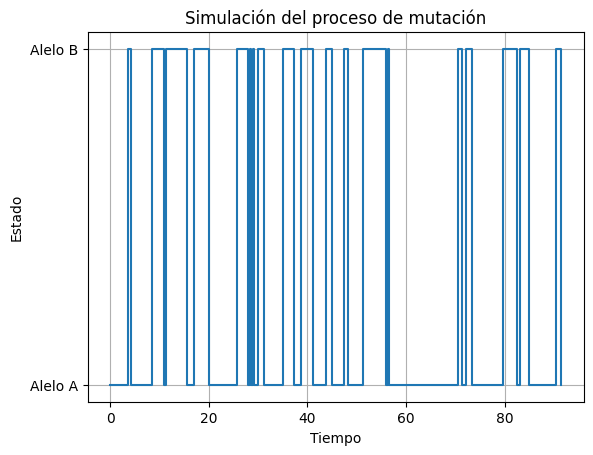

Proporción de tiempo en Alelo A: 0.6294
Proporción de tiempo en Alelo B: 0.3706
Probabilidad estacionaria Alelo A: 0.6250
Probabilidad estacionaria Alelo B: 0.3750


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Tasas de mutación
lambda_AB = 0.3  # Tasa de mutación de A a B
lambda_BA = 0.5  # Tasa de mutación de B a A

# Matriz Q
Q = np.array([
    [-lambda_AB, lambda_AB],  # Estado A
    [lambda_BA, -lambda_BA],  # Estado B
])

def simular_proceso_mutacion(Q, estado_inicial, tiempo_maximo):
    tiempos = [0]
    estados = [estado_inicial]
    tiempo_actual = 0
    estado_actual = estado_inicial
    
    while tiempo_actual < tiempo_maximo:
        tasa_salida = -Q[estado_actual, estado_actual]
        tiempo_espera = np.random.exponential(scale=1/tasa_salida)
        tiempo_actual += tiempo_espera
        
        if tiempo_actual > tiempo_maximo:
            break
        
        # Probabilidades de transición
        probabilidades = Q[estado_actual].copy()
        probabilidades[estado_actual] = 0
        probabilidades = probabilidades / tasa_salida
        
        siguiente_estado = np.random.choice([0, 1], p=probabilidades)
        
        tiempos.append(tiempo_actual)
        estados.append(siguiente_estado)
        estado_actual = siguiente_estado
    
    return tiempos, estados

# Configuración de la simulación
estado_inicial = 0  # Alelo A
tiempo_maximo = 100

# Ejecución de la simulación
tiempos, estados = simular_proceso_mutacion(Q, estado_inicial, tiempo_maximo)

# Visualización de resultados
nombres_estados = {0: 'Alelo A', 1: 'Alelo B'}
estados_nombres = [nombres_estados[e] for e in estados]

plt.step(tiempos, estados, where='post')
plt.yticks([0, 1], ['Alelo A', 'Alelo B'])
plt.xlabel('Tiempo')
plt.ylabel('Estado')
plt.title('Simulación del proceso de mutación')
plt.grid(True)
plt.show()

# Cálculo de proporciones de tiempo en cada estado
tiempos_en_estados = np.diff(tiempos)
estado_anterior = estados[:-1]

tiempo_total = tiempos[-1]

tiempo_en_A = np.sum(tiempos_en_estados * (np.array(estado_anterior) == 0))
tiempo_en_B = np.sum(tiempos_en_estados * (np.array(estado_anterior) == 1))

proporcion_A = tiempo_en_A / tiempo_total

proporcion_B = tiempo_en_B / tiempo_total

print(f"Proporción de tiempo en Alelo A: {proporcion_A:.4f}")
print(f"Proporción de tiempo en Alelo B: {proporcion_B:.4f}")

# Cálculo analítico de las probabilidades estacionarias
pi_A = lambda_BA / (lambda_AB + lambda_BA)
pi_B = lambda_AB / (lambda_AB + lambda_BA)

print(f"Probabilidad estacionaria Alelo A: {pi_A:.4f}")
print(f"Probabilidad estacionaria Alelo B: {pi_B:.4f}")


# 6. Interpretación de los Resultados

Al ejecutar la simulación, obtendremos una gráfica que muestra cómo el estado del gen cambia con el tiempo debido a las mutaciones. Las transiciones entre los alelos A y B ocurren en tiempos aleatorios, con tiempos de espera distribuidos exponencialmente.

- **Tiempos de Espera**: Representan cuánto tiempo el gen permanece en un alelo antes de mutar al otro.
- **Frecuencia de Transiciones**: Depende de las tasas de mutación $\lambda_{AB}$ y $\lambda_{BA}$.
- 
# 7. Cálculo de Probabilidades de Equilibrio

En cadenas de Markov en tiempo continuo, podemos calcular las probabilidades estacionarias (de equilibrio) que indican la proporción del tiempo que el proceso pasa en cada estado a largo plazo.

## 7.1. Cálculo Analítico

Las probabilidades estacionarias $\pi$ satisfacen:

$$
\pi Q = 0
$$

Y la condición de normalización:

$$
\pi_0 + \pi_1 = 1
$$

Para nuestro caso:

$$
\begin{cases}
-\pi_0 \lambda_{AB} + \pi_1 \lambda_{BA} = 0 \\
\pi_0 + \pi_1 = 1
\end{cases}
$$

Resolviendo:

$$
\pi_0 = \frac{\lambda_{BA}}{\lambda_{AB} + \lambda_{BA}}
$$

$$
\pi_1 = \frac{\lambda_{AB}}{\lambda_{AB} + \lambda_{BA}}
$$



# 8. Ejercicios

- Implementa una clase que simule cadenas de markov a tiempo continuo dada su matriz de tasas. Incluye manejo de errores y excepciones.
- Usa la clase para incluir los siguientes supuestos:

## Consideremos un gen en una población de bacterias que puede existir en tres formas alélicas:

- **Alelo A (Resistencia a antibióticos):** Proporciona resistencia a cierto antibiótico.
- **Alelo B (Sensibilidad al antibiótico):** No confiere resistencia; las bacterias son sensibles.
- **Alelo C (Super-resistencia):** Proporciona resistencia mejorada, pero a costa de un crecimiento más lento.

Las mutaciones pueden ocurrir entre estos alelos con ciertas tasas, y la selección natural influye en sus frecuencias en la población.

#### Tasas de Mutación entre Alelos

- **Mutaciones espontáneas:**
  - De A a B: $\lambda_{AB} = 0.01$
  - De A a C: $\lambda_{AC} = 0.005$
  - De B a A: $\lambda_{BA} = 0.02$
  - De B a C: $\lambda_{BC} = 0.01$
  - De C a A: $\lambda_{CA} = 0.015$
  - De C a B: $\lambda_{CB} = 0.005$


## Selección Natural

La selección natural es un mecanismo evolutivo donde ciertos alelos confieren ventajas o desventajas en términos de supervivencia y reproducción.

### Implementación
- **Estados del Modelo:** Los mismos que antes, representando cada alelo.
- **Tasas de Transición Ajustadas:** Las tasas de mutación pueden ser influenciadas por la selección natural.
- **Tasas de Reemplazo Efectivas:** Incorporamos coeficientes selectivos ($s_i$) que afectan la probabilidad de que un alelo sea reemplazado por otro.

### Ejemplo
- Un alelo A es ventajoso, y el alelo B es desfavorable.
- Ajustamos las tasas de transición:
  - Incrementamos la tasa de mutación de B a A ($\lambda_{BA}$).
  - Disminuimos la tasa de mutación de A a B ($\lambda_{AB}$).


- **Ventajas y desventajas:**
  - **Alelo A:** Ventajoso en presencia del antibiótico.
  - **Alelo B:** Desventajoso; las bacterias pueden ser eliminadas por el antibiótico.
  - **Alelo C:** Ventajoso por la super-resistencia, pero con costo en la tasa de crecimiento.

- **Efecto en las tasas de transición:**
  - Incrementamos las tasas de transición hacia alelos ventajosos.
  - Disminuimos las tasas de transición hacia alelos desventajosos.

#### 2.2.3. Ajuste de Tasas con Selección
- Ajustamos las tasas de transición para reflejar la selección:
  - Incrementamos las tasas de mutación hacia alelos ventajosos en un factor de selección *s*.

- Por ejemplo, para transiciones hacia el alelo A (ventajoso en presencia del antibiótico):
  $$ \lambda_{BA} = \lambda_{BA} \times (1 + s) $$
  $$ \lambda_{CA} = \lambda_{CA} \times (1 + s) $$

- Usamos *s = 0.5* como coeficiente selectivo.

La matriz **Q** es:

$$
Q = \begin{pmatrix}
-(\lambda_{AB} + \lambda_{AC}) & \lambda_{AB} & \lambda_{AC} \\
\lambda_{BA} & -(\lambda_{BA} + \lambda_{BC}) & \lambda_{BC} \\
\lambda_{CA} & \lambda_{CB} & -(\lambda_{CA} + \lambda_{CB})
\end{pmatrix}
$$



### Preguntas
- ¿Cuál es la distribución a largo plazo de los alelos en la población de bacterias en presencia del antibiótico?
- ¿Cómo afecta la selección natural y las tasas de mutación a la prevalencia del alelo de super-resistencia (Alelo C)?
- ¿Es posible que el alelo B (sensible al antibiótico) persista en la población a pesar de ser desventajoso?
- ¿Cómo afectan las tasas de mutación a la diversidad genética?
- ¿Qué alelo tiene mayor probabilidad de fijación en la población?
  *La fijación de un alelo en una población ocurre cuando ese alelo se convierte en el único presente en la población para un locus genético dado, es decir, todos los individuos portan ese alelo específico. Esto implica que la frecuencia del alelo ha alcanzado el 100% (frecuencia de 1) y, por lo tanto, otros alelos han sido eliminados de la población.*
- ¿Cómo afecta una tasa de mutación elevada a la estabilidad genética de una población?
- ¿Cómo influye la selección natural en la frecuencia de los alelos a lo largo del tiempo?
- ¿Cuál es el tiempo esperado para que el alelo ventajoso se fije en la población?